### <Orbi 과외 시장 data 분석>


독어교육과 2014-19498 정은주 인류학과 2016-19715 송지은<br/>
4. text file에서 불러온 값을 분석하기 위해, dictionary data Structure를 이용하여 값을 담았습니다.<br/>
   학년별 분석 file의 경우는 문이과를 포함하기 때문에 이를 고려하기 위해 dictionary를 2개 return하도록 했습니다.<br/>
5. Pandas 및 Matplotlib을 이용해 도표와 그래프로 시각화(total, percentage 등 추가)<br/>
   그래프의 경우 한글파일이 깨져 이를 위한 코드를 추가로 첨부하였습니다.


## 4. File Read and Dictionary 

In [1]:
areas_cnt = {}
gender_cnt = {}
grade_cnt = {}

fp = open('orbi_areas.txt', 'r')
fp2 = open('orbi_grade_route.txt', 'r')
fp3 = open('orbi_gender.txt', 'r')
def FrequencyCount(f, dict):
    for line in f:
        line = line.rstrip("\n")
        line = line.lstrip()
        if(line != ""):
            dict[line] = dict.get(line, 0) + 1

    for key, val in dict.items():
        print(key, val)
    
    sum = 0
    for key, val in dict.items():
        if(key != ""):
            sum += val
            
    dict['total'] = sum
    print(sum)
    return dict

def GradeFrequencyCount(f, dict):
    dict2 = {}
    for line in f:
        line = line.rstrip("\n")
        line = line.lstrip()
        
        if(line != ""):
            if(line == "문과" or line == "이과"):
                dict2[line] = dict2.get(line, 0) + 1
                
            else:
                dict[line] = dict.get(line, 0) + 1

    sum=0
    sum2 = 0
    for key, val in dict.items():
        print(key, val)
        if(key != ""):
            sum += val
    
    for key, val in dict2.items():
        print(key, val)
        if(key != ""):
            sum2 += val        
            
    dict['total'] = sum
    dict2['미응답'] = sum-sum2
    dict2['total'] = sum
    print(sum)
    return dict, dict2

### 4-1: 지역별 과외수요

In [2]:
areas_cnt = FrequencyCount(fp.readlines(), areas_cnt)

서울 강남구 1808
서울 서초구 592
서울 구로구 126
서울 노원구 395
서울 송파구 583
서울 마포구 224
서울 강북구 157
서울 양천구 477
서울 광진구 208
서울 은평구 178
서울 서대문구 167
서울 동대문구 154
서울 도봉구 174
서울 강서구 281
서울 성북구 217
서울 중구 69
서울 성동구 158
서울 관악구 292
서울 동작구 264
서울 강동구 378
서울 금천구 73
서울 중랑구 111
서울 용산구 107
서울 영등포구 124
서울 종로구 84
7401


### 4-2: 학년별 과외 수요

In [3]:
grade_cnt, grade_cnt2 = GradeFrequencyCount(fp2.readlines(), grade_cnt)

고3 1788
재수/N수생 2345
고1 662
중2 215
대학생 978
중1 329
중3 280
고2 804
이과 3965
문과 2601
7401


### 4-3: 성별 과외 수요

In [4]:
gender_cnt = FrequencyCount(fp3.readlines(), gender_cnt)

남 4026
여 3375
7401


# 5. Matplotlib and Pandas

In [5]:
from matplotlib import pyplot as plt
from matplotlib import rc, font_manager
import numpy as np
import pandas as pd

In [6]:
S1 = pd.Series(areas_cnt)
S2 = pd.Series(grade_cnt)
S3 = pd.Series(grade_cnt2)
S4 = pd.Series(gender_cnt)
total = areas_cnt['total']
print(S1, "\n")
print(S2, "\n")
print(S3, "\n")
print(S4, "\n")

서울 강남구     1808
서울 서초구      592
서울 구로구      126
서울 노원구      395
서울 송파구      583
서울 마포구      224
서울 강북구      157
서울 양천구      477
서울 광진구      208
서울 은평구      178
서울 서대문구     167
서울 동대문구     154
서울 도봉구      174
서울 강서구      281
서울 성북구      217
서울 중구        69
서울 성동구      158
서울 관악구      292
서울 동작구      264
서울 강동구      378
서울 금천구       73
서울 중랑구      111
서울 용산구      107
서울 영등포구     124
서울 종로구       84
total      7401
dtype: int64 

고3        1788
재수/N수생    2345
고1         662
중2         215
대학생        978
중1         329
중3         280
고2         804
total     7401
dtype: int64 

이과       3965
문과       2601
미응답       835
total    7401
dtype: int64 

남        4026
여        3375
total    7401
dtype: int64 



## 5-1: Pandas DataFrame

In [7]:
Data = {'지역': list(areas_cnt.keys()), 'count': list(areas_cnt.values())}
Area = pd.DataFrame.from_dict(Data)
Area = Area.sort_values(by = ['count'], ascending = False)
Area.index = ["" if i is 0 else i for i in range(0, len(Area['count']))]
Area['percentage'] = [str(percent*100/total)+'%' for percent in Area['count']]

In [8]:
Data2 = {'학년': list(grade_cnt.keys()), 'count': list(grade_cnt.values())}
Grade = pd.DataFrame.from_dict(Data2)
Grade['percentage'] = [str(percent*100/total)+'%' for percent in Grade['count']]
Grade = Grade.sort_values(by = ['count'], ascending = False)
Grade.index = ["" if i is 0 else i for i in range(0, len(Grade['count']))]

In [9]:
Data3 = {'문과/이과': list(grade_cnt2.keys()), 'count': list(grade_cnt2.values())}
Grade2 = pd.DataFrame.from_dict(Data3)
Grade2 = Grade2.sort_values(by = ['count'], ascending = False)
Grade2['percentage'] = [str(percent*100/total)+'%' for percent in Grade2['count']]
Grade2.index = ["" if i is 0 else i for i in range(0, len(Grade2['count']))]

In [10]:
Data4 = {'성별': list(gender_cnt.keys()), 'count': list(gender_cnt.values())}
Gender = pd.DataFrame(Data4)
Gender = Gender.sort_values(by = ['count'], ascending = False)
Gender['percentage'] = [str(percent*100/total)+'%' for percent in Gender['count']]
Gender.index = ["" if i is 0 else i for i in range(0, len(Gender['count']))]

In [11]:
Area

,지역,count,percentage
,total,7401,100.0%
1,서울 강남구,1808,24.42913119848669%
2,서울 서초구,592,7.998919064991218%
3,서울 송파구,583,7.877313876503175%
4,서울 양천구,477,6.445074989866234%
5,서울 노원구,395,5.337116605864073%
6,서울 강동구,378,5.107417916497771%
7,서울 관악구,292,3.945412782056479%
8,서울 강서구,281,3.7967842183488716%
9,서울 동작구,264,3.56708552898257%


In [12]:
Grade

,학년,count,percentage
,total,7401,100.0%
1,재수/N수생,2345,31.684907444939874%
2,고3,1788,24.158897446291043%
3,대학생,978,13.214430482367248%
4,고2,804,10.8633968382651%
5,고1,662,8.94473719767599%
6,중1,329,4.44534522361843%
7,중3,280,3.7832725307390893%
8,중2,215,2.9050128361032295%


In [13]:
Grade2

,문과/이과,count,percentage
,total,7401,100.0%
1,이과,3965,53.57384137278746%
2,문과,2601,35.143899473044186%
3,미응답,835,11.282259154168356%


In [14]:
Gender

,성별,count,percentage
,total,7401,100.0%
1,남,4026,54.398054316984194%
2,여,3375,45.601945683015806%


## 5-2: Matplotlib 
** Graph 한글 font 오류로 인해 mac 컴퓨터 내의 font 설정 과정까지 기입되어 있습니다.

In [15]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:5]

['/opt/X11/share/fonts/OTF/SyrCOMMalankara.otf',
 '/System/Library/Fonts/Supplemental/STIXGeneral.otf',
 '/System/Library/Fonts/NotoSansKannada.ttc',
 '/System/Library/Fonts/Supplemental/Oriya MN.ttc',
 '/System/Library/Fonts/Supplemental/Khmer MN.ttc']

In [16]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

328


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  """Entry point for launching an IPython kernel.


In [17]:
f= [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[:10]

374


['STIXNonUnicode',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif Display']

In [18]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Apple SD' in f.name]

[('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc')]

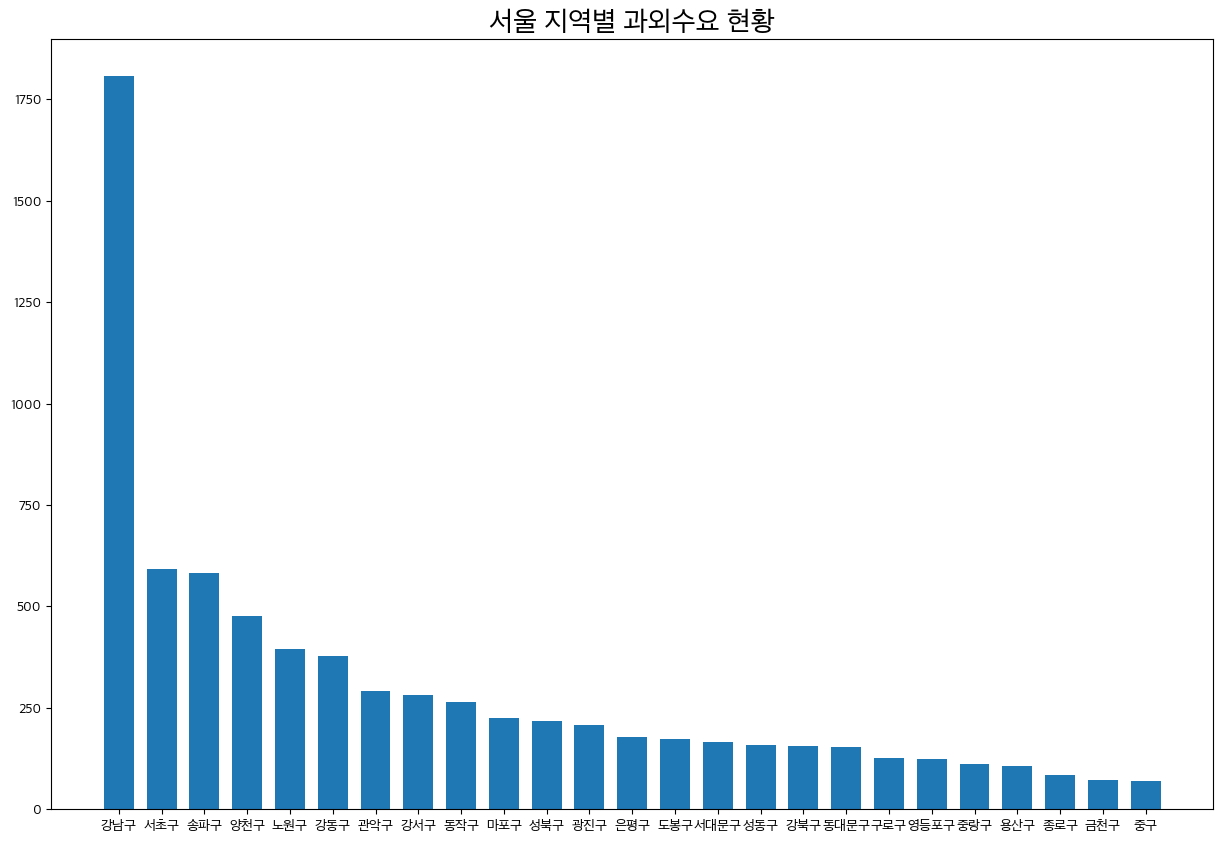

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'Apple SD Gothic Neo',
    }
)

path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
fontprop = fm.FontProperties(fname = path, size = 14)
mpl.rcParams['axes.unicode_minus'] = False

areaList = [area[3:] for area in Area['지역']]
countList = [cnt for cnt in Area['count']]
plt.figure(figsize=(15, 10))
plt.bar(areaList[1:], countList[1:], align='center', width=0.7)
plt.title('서울 지역별 과외수요 현황', fontproperties = fontprop, fontsize = 20)
plt.show()

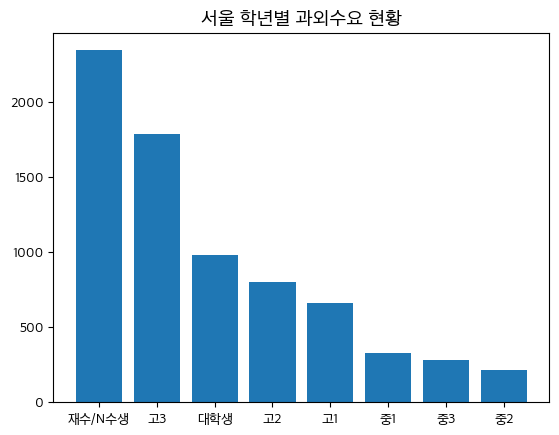

In [20]:
areaList = [grade for grade in Grade['학년']]
countList = [cnt for cnt in Grade['count']]
plt.bar(areaList[1:], countList[1:])
plt.title('서울 학년별 과외수요 현황', fontproperties = fontprop)
plt.show()

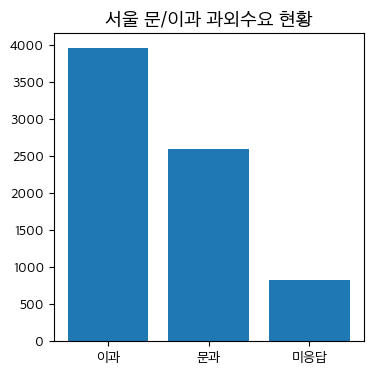

In [21]:
areaList = [grade for grade in Grade2['문과/이과']]
countList = [cnt for cnt in Grade2['count']]
plt.figure(figsize=(4, 4))
plt.bar(areaList[1:], countList[1:])
plt.title('서울 문/이과 과외수요 현황', fontproperties = fontprop)
plt.show()

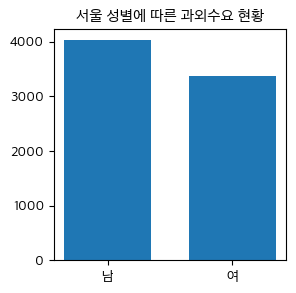

In [22]:
areaList = [grade for grade in Gender['성별']]
countList = [cnt for cnt in Gender['count']]
plt.figure(figsize=(3, 3))
plt.bar(areaList[1:], countList[1:], width =0.7)
plt.title('서울 성별에 따른 과외수요 현황', fontproperties = fontprop, fontsize = 11)
plt.show()